# Seaborn
[materi week3 day5](https://sanbercode.com/bootcamp/class/371/materi/seaborn/8976297f-0301-4a5e-b2e4-3b49e50f2545)

Matplotlib juga hadir satu dekade lebih awal daripada Pandas sehingga tidak cocok untuk disandingkan dengan DataFrames Pandas, untuk mem-visualisasikan data dari DataFrame Pandas, kita harus mengambil masing-masing Series-nya kemudian menggabungkannya ke dalam format yang sesuai. Alangkah baiknya jika ada library untuk plotting yang dapat menggunakan label dari DataFrame ketika menggambarkan plotnya.

Jawaban untuk permasalahan di atas adalah Seaborn. Seaborn merupakan API yang berdasar dari Matplotlib, memiliki high-level function untuk tipe plot yang umum digunakan untuk statistik, Seaborn juga dapat diintegrasikan dengan DataFrames dari Pandas.

Meskipun Matplotlib sudah menambahkan plt.style sehingga memudahkan untuk menangani Pandas, Seaborn tetap sangat direkomendasikan untuk digunakan.

## Seaborn vs. Matplotlib
Perhatikan contoh plot sederhana pada Matplotlib berikut:

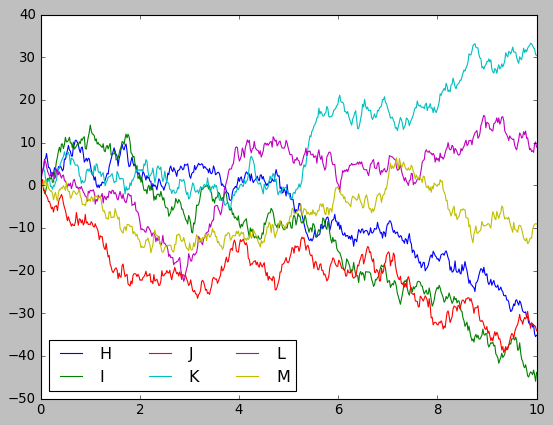

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

# Buat beberapa data
sat = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(sat.randn(500, 6), 0)

# Plot data menggunakan setting default Matplotlib
plt.plot(x, y)
plt.legend('HIJKLM', ncol=3, loc='lower left');

Meskipun hasilnya memiliki semua informasi yang kita inginkan, tampilannya kurang memiliki nilai estetika, dan bahkan terlihat jadul untuk visualisasi di abad 21 ini.

Sekarang perhatikan contoh penggunaan Seabon untuk data yang sama:

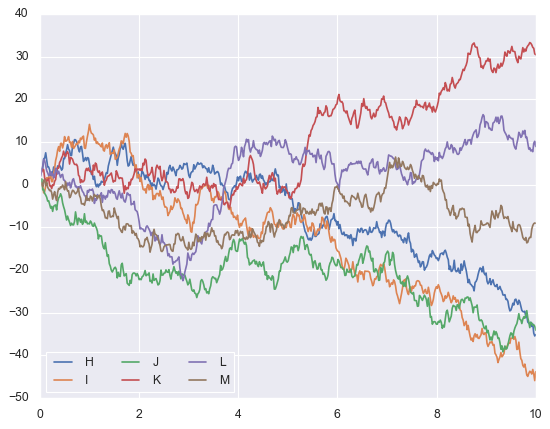

In [2]:
import seaborn as sns
sns.set()

# Menggunakan data yang sama dengan di atas
plt.plot(x, y)
plt.legend('HIJKLM', ncol=3, loc='lower left');

## Exploring Seaborn Plots

Tujuan utama Seaborn yaitu menyediakan perintah high-level untuk membuat berbagai jenis plot yang berguna pada eksplorasi data statistika, atau bahkan fitting model statistika.

Mari kita lihat beberapa jenis plot yang tersedia di Seaborn. Catatan: contoh berikut dapat dihasilkan menggunakan perintah Matplotlib, tapi menggukan API Seaborn akan lebih menyenangkan.

## Histogram, KDE, dan density

Seringkali pada visualisasi data statistika, yang kita perlukan hanyalah histogram dan joint distribution dari beberapa variabel. Contoh histogram sebagai berikut:

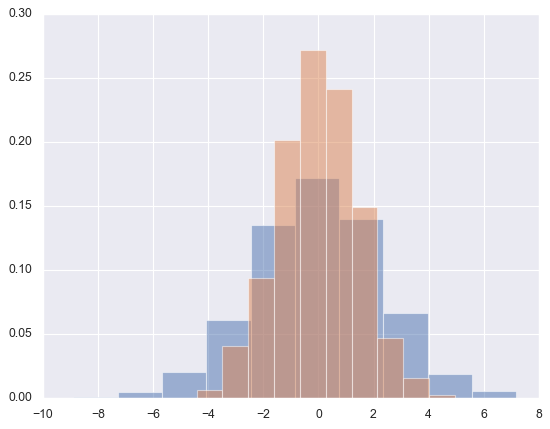

In [3]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], bins=10, density=True, alpha=0.5)

Kita juga dapat menghasilkan estimasi yang tidak kasar dari distribusi tersebut menggunakan kernel density estimation (KDE) yang dapat dihasilkan menggunakan Seaborn dengan `sns.kdeplot`:

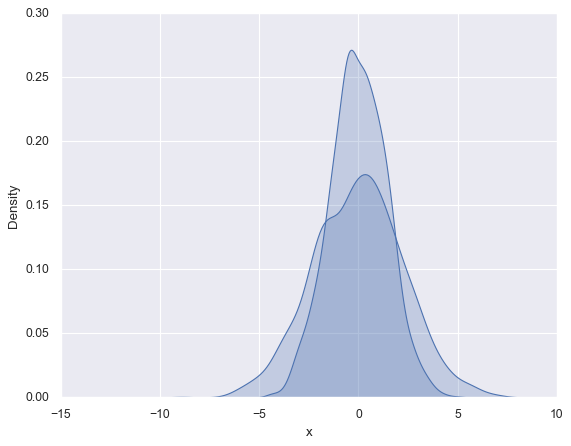

In [4]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histogram dan KDE dapat digabungkan menggunakan `displot`:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


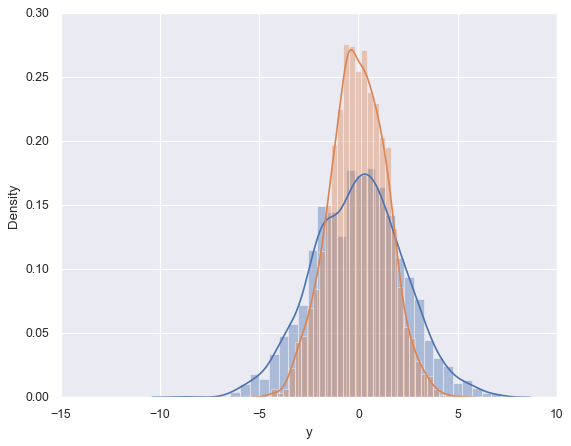

In [5]:
sns.distplot(data['x'])
sns.distplot(data['y']);

Jika kita menggunakan kedua data dari dataset ke dalam kdeplot, maka akan menghasilkan visualisasi dua-dimensi dari data tersebut:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


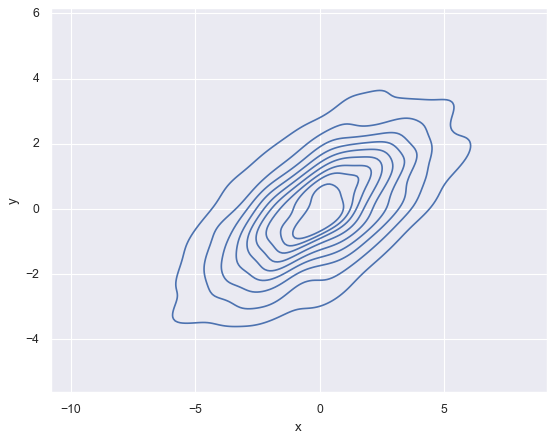

In [6]:
sns.set()
sns.kdeplot(data['x'], data['y']);

Kita dapat melihat joint distribution dan marginal distribution secara bersamaan menggunakan `sns.jointplot`. Untuk plot ini, kita gunakan style white background:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


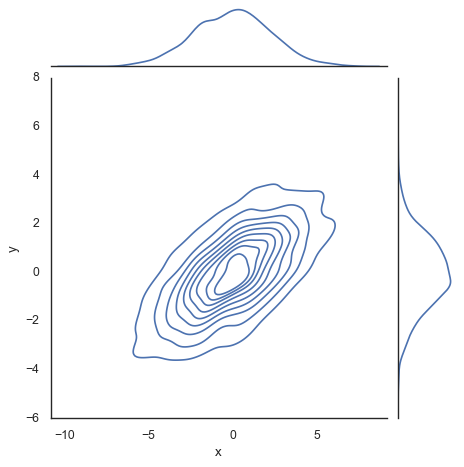

In [7]:
sns.set()
with sns.axes_style('white'):
    sns.jointplot(data['x'], data['y'], kind='kde')

Ada beberapa parameter lain yang dapat kita ganti pada `jointplot`, contohnya adalah kita dapat menggunkaan histogram dengan base hexagonal:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


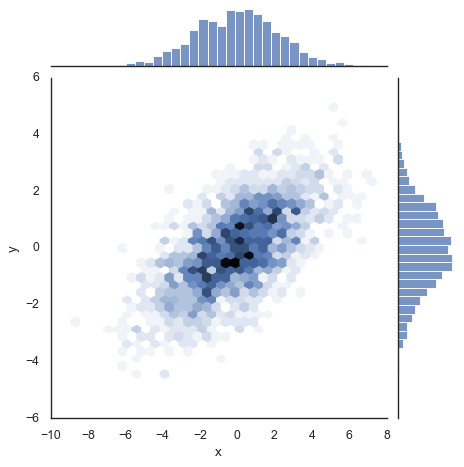

In [8]:
with sns.axes_style('white'):
    sns.jointplot(data['x'], data['y'], kind='hex');

## Pair plots
Ketika kita membuat joint plot menggunakan dataset dengan dimensi yang lebih besar, maka akan menghasilkan pair plots, yang sangat berguna untuk mengeksplorasi hubungan antar data multidimensi, juga melihat pair plots secara berpasangan.

Kita akan menggunakan dataset Iris yang cukup terkenal, berisi ukuran petal dan sepal iris dari tiga spesies:

In [10]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Mem-visualisasikan dengan mudah hubungan multidimensi dari beberapa sampel menggunakan `sns.pairplot`:

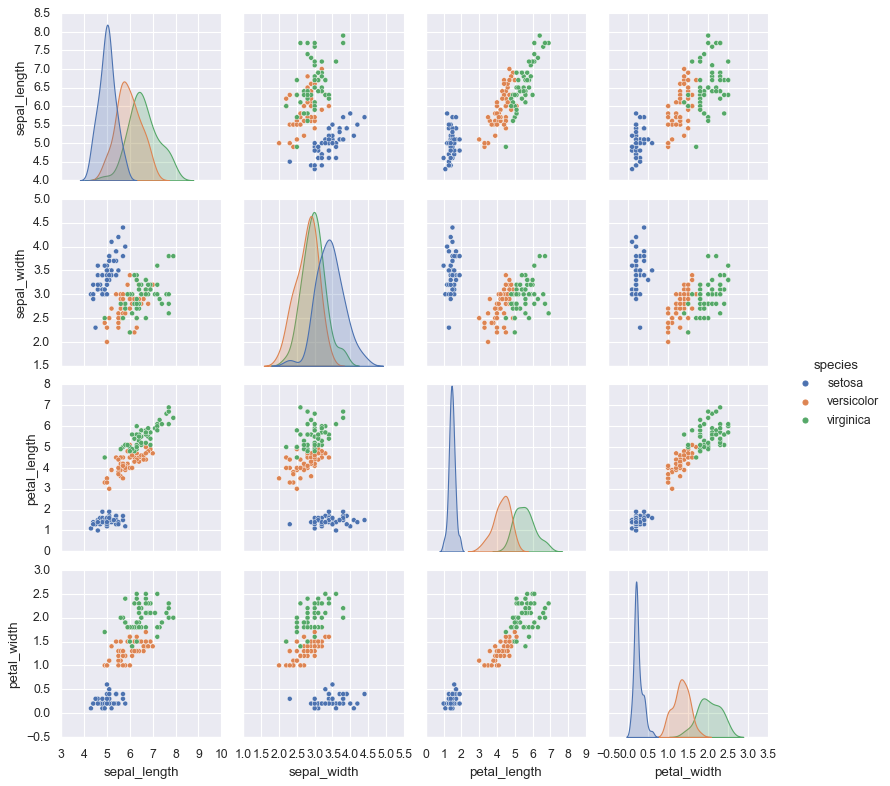

In [11]:
sns.pairplot(iris, hue='species');

## Faceted histograms

Terkadang, langkah terbaik ntuk menganalisa data adalah menggunakan histogram dari bagian-bagiannya. FacetGrid milik Seaborn menjadikan langkah ini sangat mudah. Kita akan menggunakan data 'tips' dari dataset Seaborn:

In [30]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

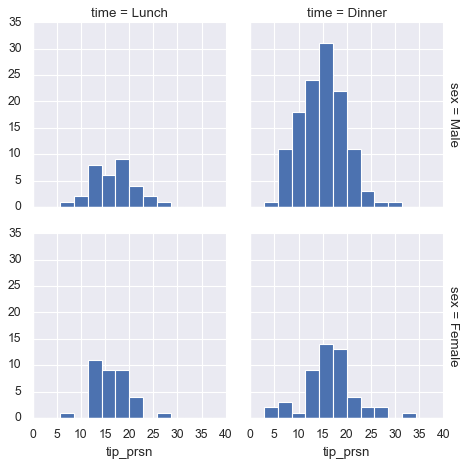

In [31]:
tips['tip_prsn'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_prsn", bins=np.linspace(0, 40, 15));

## Categorical plots

Categorical plots dapat juga digunakan untuk menampilkan visualisasi semacam ini. Kita dapat melihat distribusi sebuah parameter dalam bins yang memiliki nilai dari parameter lain:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


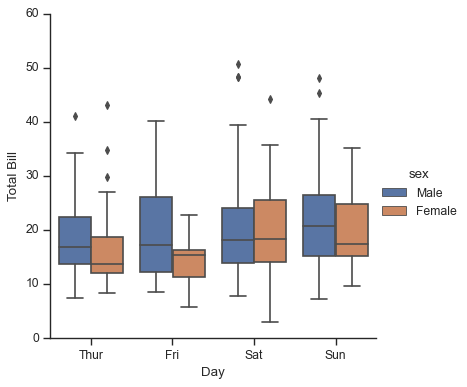

In [32]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

## Joint distributions

Seperti pair plot yang sudah kita bahas, kita dapat menggunakan `sns.jointplot` untuk menampilkan joint distribution antara dataset yang berbeda, seiring dengan marginal distributions-nya:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


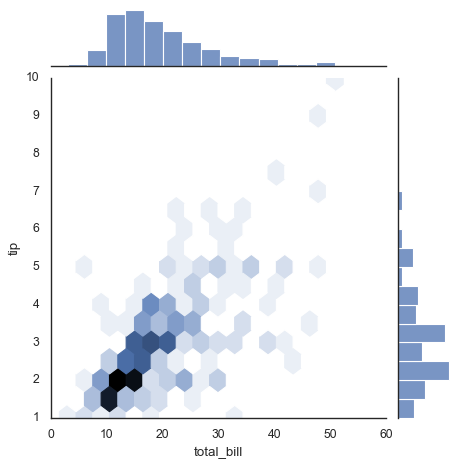

In [33]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

Joint plot juga dapat melakukan kernel density estimation dan regression secara otomatis:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


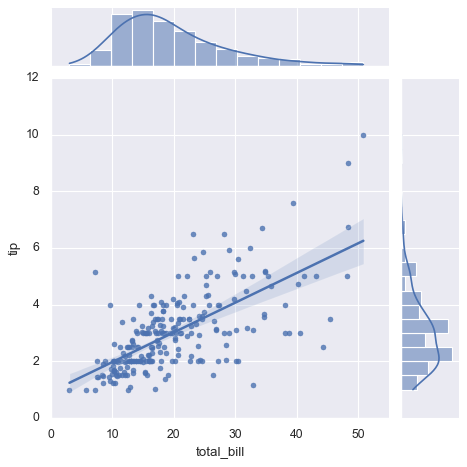

In [37]:
#from scipy import stats
#import scipy.stats

sns.jointplot("total_bill", "tip", data=tips, kind='reg', xlim=(0,55), ylim=(0,12)); #, stat_func=stats.pearsonr

# stat_func --> deprecated
# xlim dan ylim --> ukuran grid

## Bar Plots

Time series data dapat ditampilkan menggunakan bar plot pada sns.catplot. Kali ini kita menggunakan dataset 'planets' yang ada pada Seaborn:

medium: [planet dataset](https://bramtunggala.medium.com/manipulating-data-with-pandas-part-2-484f654ad31d)

In [18]:
planets = sns.load_dataset('planets')
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


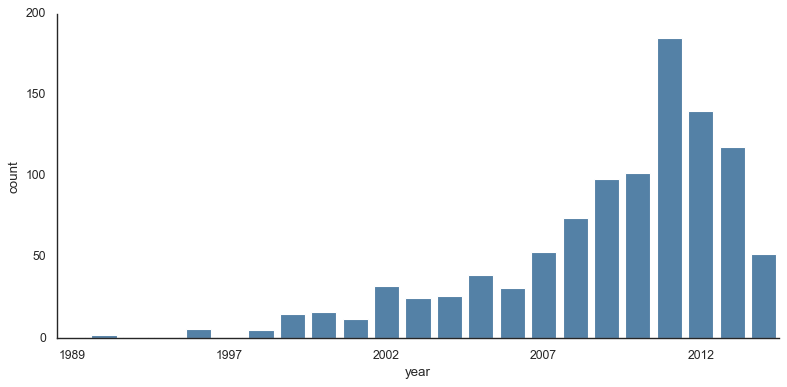

In [19]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=2,
                    kind="count", color='steelblue')
    g.set_xticklabels(step=5)

## Tool Visualisasi Lainnya

- Altair Altair merupakan library visualisasi statistik untuk python, berdasar dari Vega dan Vega-Lite. Altair merupakan alat visualisasi yang sangat mantap dan cukup ringkas untuk menampilkan berbagai macam grafik statistika. Kita hanya perlu menentukan hubungan antara masing-masing data, warna, ukuran, dan lainnya, sedangkan detail plotnya akan ditangani secara otomatis. Dengan Altair, kita bisa menghabiskan waktu lebih banyak untuk memahami isi data dibandingkan berpusing-pusing memikirkan coding-nya.
- Bokeh merupakan library visualisasi JavaScript dengan frontend Python yang dapat membuat visualisasi interaktif, juga dapat menangani streaming dataset atau dataset yang sangat besar. Python frontend menghasilkan output berupa struktur data JSON yang dapat di interpretasi menggunakan Bokeh JS engine.
- Plotly, merupakan produk open source dari perusahaan Plotly. Karena produk dari startup, Plotly diurus dan dikembangkan dengan serius. Penggunaannya gratis pooll (Sangat direkomendasikan untuk dicoba).
- VisPy, merupakan projek yang sedang dikembangkan secara aktif, berfokus pada visualisasi dinamis dari dataset yang sangat besar. Karena ditargetkan untuk OpenGL dan penggunaan prosessor grafik secara efisien, VisPy dapat me-render visualisasi yang cukup besar dan menakjubkan. WoW.